In [8]:
import pandas as pd

In [11]:
df = pd.read_excel('highwaybus.xlsx')
df.head()

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1


In [12]:
#필터링1 - 우등고속에 대한 데이터대상
df_ex = df[df.차종=='우등']
df_ex.head()

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
2,우등,88선,광주,울산신복,327.8,164,545,11.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1
6,우등,88선,광주,구미,246.1,208,2634,45.2
7,우등,88선,광주,경주,286.9,139,2102,54.0


In [16]:
#필터링2 - 경부선 총 이용인원 1000명 이상인 데이터에 대한 분석
df_gx = df[(df.선별=='경부선') & (df.총이용인원>=1000)]
df_gx.sort_values(by='총이용인원', ascending = 0).head(4)

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
23,고속,경부선,서울경부,천안,84.1,5213,185241,79.0
18,고속,경부선,서울경부,안성,77.8,3541,99277,62.3
21,우등,경부선,서울경부,대전복합,153.2,3555,77759,78.1
31,우등,경부선,서울경부,청주,123.0,3705,77586,74.8


In [18]:
#그룹화작업 - 1
df.groupby('선별').count()

,차종,출발지,도착지,거리,총운행횟수,총이용인원,이용율
선별,,,,,,,
88선,18,18,18,18,18,18,18
경부선,105,105,105,105,105,105,105
경인선,25,25,25,25,25,25,25
구마선,30,30,30,30,30,30,30
남해선,21,21,21,21,21,21,21
동해선,4,4,4,4,4,4,4
영동선,26,26,26,26,26,26,26
호남선,122,122,122,122,122,122,122


In [21]:
d_group1 = df.groupby('선별')
d_group1['차종'].count().sort_values(ascending = False)

선별
호남선    122
경부선    105
구마선     30
영동선     26
경인선     25
남해선     21
88선     18
동해선      4
Name: 차종, dtype: int64

<IPython.core.display.Javascript object>


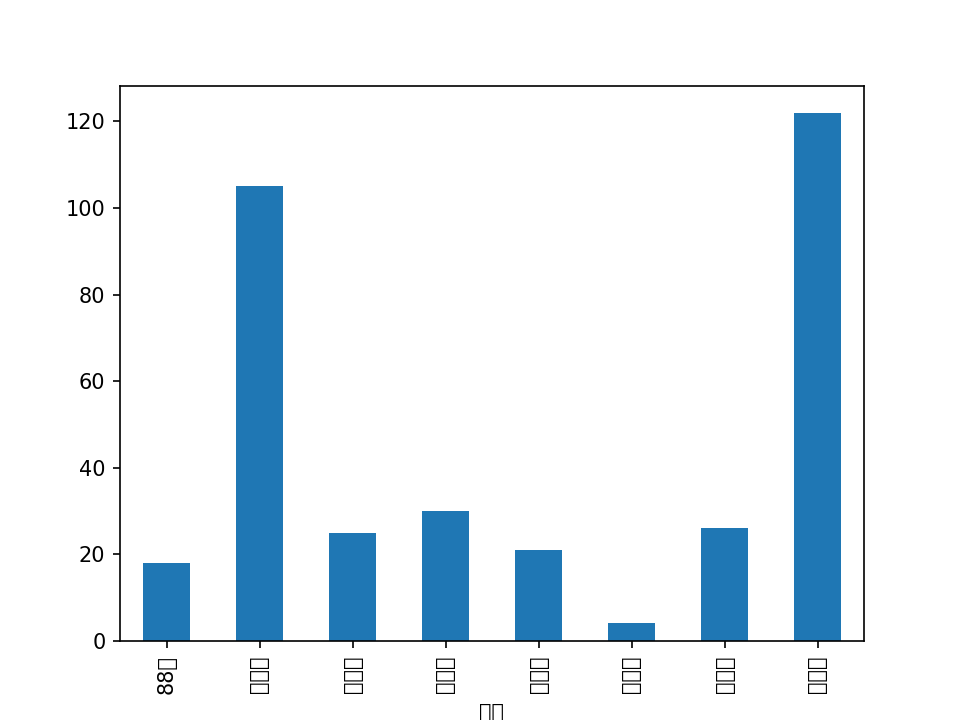

<AxesSubplot:xlabel='선별'>

In [22]:
%matplotlib notebook
d_group1['차종'].count().plot(kind='bar')

In [25]:
# 차종, 선별 그룹화 작업
d_avg = df.groupby(['차종', '선별'])
d_avg['총이용인원'].mean()

차종  선별 
고속  88선     1615.857143
    경부선    15246.333333
    경인선     2719.636364
    구마선     2621.785714
    남해선     3613.384615
    동해선     3604.000000
    영동선    18547.785714
    호남선     7451.238095
우등  88선     5566.545455
    경부선    13786.229167
    경인선     8937.071429
    구마선    11092.625000
    남해선     9492.125000
    동해선    14627.500000
    영동선    19762.166667
    호남선    13218.694915
Name: 총이용인원, dtype: float64

In [28]:
#교차테이블 작성하는 작업
pd.crosstab(df['차종'],df['선별'], margins=True)

선별,88선,경부선,경인선,구마선,남해선,동해선,영동선,호남선,All
차종,,,,,,,,,
고속,7,57,11,14,13,2,14,63,181
우등,11,48,14,16,8,2,12,59,170
All,18,105,25,30,21,4,26,122,351
